<div class="alert alert-block alert-info">
    <b>この章の目的</b>
    <p>HSRの各アーム関節の駆動方法を学習します</p>
</div> 

アーム関節の駆動にはmoveit_commanderを使います。

ROSの通信を初期化するとともに、moveit_commanderをインポートします。

In [2]:
import rospy
import moveit_commander

rospy.init_node("moveit_command_sender")

moveit_commanderを使ってアームを駆動するためのインターフェースを生成します。

In [3]:
arm = moveit_commander.MoveGroupCommander("arm")

アームとして定義されている各関節の名称を配列として取得します。以降の各コマンドでは、この配列の順序に対応させて各関節値を設定します。

In [7]:
arm.get_active_joints()

['arm_lift_joint',
 'arm_flex_joint',
 'arm_roll_joint',
 'wrist_flex_joint',
 'wrist_roll_joint',
 'wrist_ft_sensor_frame_joint']

各関節がロボットのどの位置にあるか確認しましょう。

rvizを立ち上げて、「Add」ボタンを押して「RobotModel」と「TF」を追加します。

「TF」を展開して、「Frames」から興味のある関節名にチェックを入れてその位置を確認しましょう。

その際に「RobotModel」の「Alpha」を0.3程度に設定すると、ロボットの体が半透明になって確認しやすいです。

In [11]:
!import -window RViz* /tmp/screen.png

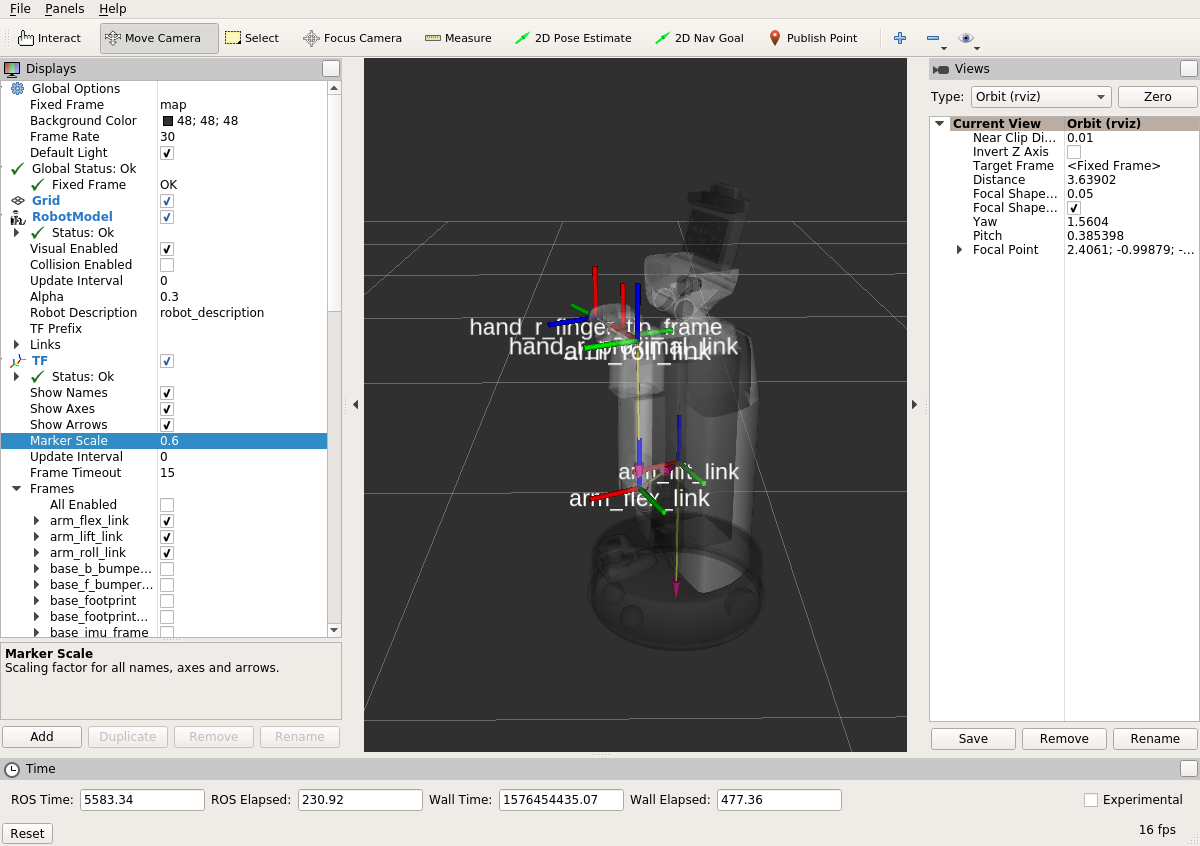

In [12]:
from IPython.display import Image
with open('/tmp/screen.png','rb') as file:
    display(Image(data=file.read()))

各関節角の現在値を取得します。関節角度の単位はラジアンで返ってきます。

In [4]:
v = arm.get_current_joint_values()
v

[0.05000012050063391,
 -1.652796744444629e-05,
 -1.5697200638624778,
 -1.5712968784308874,
 5.354221043418761e-06,
 0.0]

試しに指定した関節値にアームを駆動してみます。

まずは、目標の関節値を設定します。

In [26]:
arm.set_joint_value_target([0, 0, 0, 0, 0, 0])

目標を設定後「go()」コマンドを実行することで、アームが動きます。

In [27]:
arm.go()

True

<div class="alert alert-block alert-info">
    <b>課題</b>
    <p>「モノを拾う」アームの動きを作ってみましょう。</p>
</div> 

<div class="alert alert-block alert-info">
    <b>次の学習</b>
    <p>アームの各関節を設定して動きを作るのは案外大変です。「逆運動学」を使うと手先の目標座標から各関節に設定すべき角度を自動で算出することができます。</p>
</div> 